In [37]:
import os, sys

import numpy as np
import matplotlib.pyplot as plt
import pylab as p
import seaborn as sns

In [38]:
def plot_quiver(log_file, st=0, ed=10000):
    prey_num = []
    predator_num = []
    with open(log_file)as fin:
        for line in fin:
            line = line.split()
            prey_num.append(int(line[7]))
            predator_num.append(int(line[9]))

    predator_num = predator_num[st:]
    prey_num = prey_num[st:]
    ed = len(predator_num)
    x = range(len(predator_num))
    length = len(predator_num)

    predator_num_avg = []
    prey_num_avg = []

    DX = [0]
    DY = [0]
    T = 100
    for i in range(0, length, 40):
        predator_tot = 0
        prey_tot = 0
        for j in range(i, min(i + T, len(x))):
            predator_tot += predator_num[j]
            prey_tot += prey_num[j]

        predator_tot = 1. * predator_tot / T
        prey_tot = 1. * prey_tot / T
        predator_num_avg.append(predator_tot)
        prey_num_avg.append(prey_tot)
        DX.append(predator_num[j] - predator_num[i])
        DY.append(prey_num[j] - prey_num[i])    

    M = (np.hypot(DX, DY))   
    M[ M == 0] = 1.                                 # Avoid zero division errors 
    DX /= M                                        # Normalize each arrows
    DY /= M
    Q = p.quiver(predator_num_avg, prey_num_avg, DX[1:], DY[1:], M, pivot='mid', cmap=p.cm.jet)


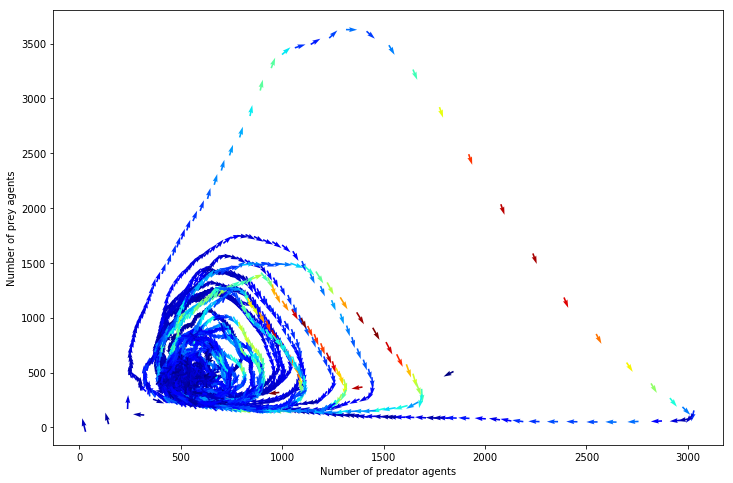

In [39]:
log_file = './results/simple_population_dynamics_ga/exp_21/test_logs/1/log.txt'

plt.figure(figsize=(12, 8))
plot_quiver(log_file, st=0)


log_file = './results/simple_population_dynamics_ga/exp_21/test_logs/12/log.txt'
plot_quiver(log_file, st=700, ed=5000)
#plt.scatter(2500, 1500, facecolors='black',alpha=.55, s=100)

log_file = './results/simple_population_dynamics_ga/exp_21/test_logs/13/log.txt'
plot_quiver(log_file, st=700, ed=10000)

plt.xlabel('Number of predator agents')
plt.ylabel('Number of prey agents')
plt.show()



In [40]:
from statsmodels.graphics.tsaplots import plot_acf

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

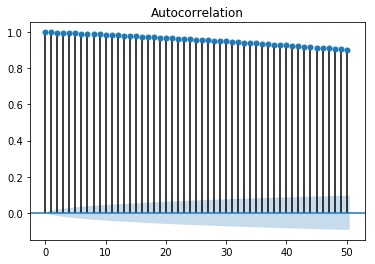

In [42]:
plot_acf(np.array(predator_num), lags=50)
plt.show()

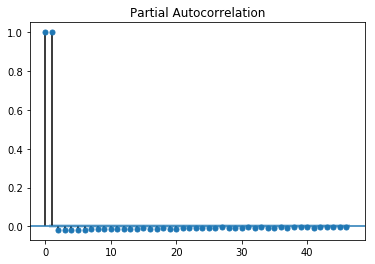

In [43]:
plot_pacf(np.array(predator_num))
plt.show()

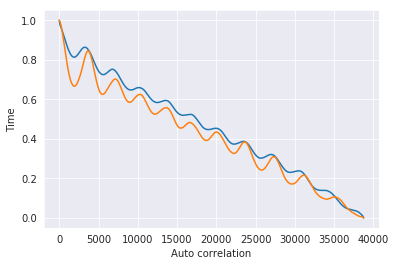

In [54]:
log_file = './results/simple_population_dynamics_ga/exp_21/test_logs/12/log.txt'
prey_num = []
predator_num = []
with open(log_file)as fin:
    for line in fin:
        line = line.split()
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))


def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]
plt.figure()
sns.set_style("darkgrid")
z = autocorr(predator_num)
plt.plot(z/float(z.max()))

z = autocorr(prey_num)
plt.plot(z/float(z.max()))
plt.xlabel('Auto correlation')
plt.ylabel('Time')
plt.savefig('auto_correlation.png')


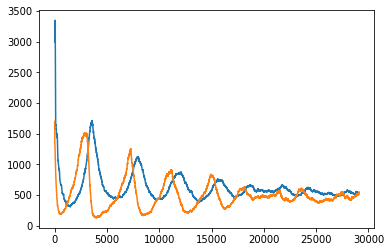

In [28]:
plt.plot(predator_num)
plt.plot(prey_num)

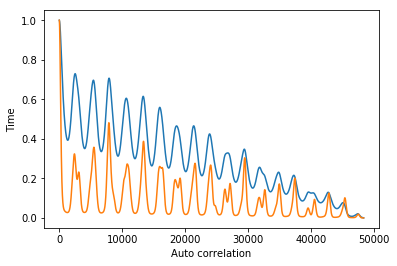

In [35]:
log_file = './results/simple_population_dynamics/exp_100/test_logs/2/log.txt'
prey_num = []
predator_num = []
with open(log_file)as fin:
    for line in fin:
        line = line.split()
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))


def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

z = autocorr(predator_num)
plt.plot(z/float(z.max()))

z = autocorr(prey_num)
plt.plot(z/float(z.max()))
plt.xlabel('Auto correlation')
plt.ylabel('Time')
plt.savefig('auto_correlation_simple.png')
